In [6]:
import pandas as pd
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('insurance.csv')

In [8]:
# Display the first 5 top of the dataset
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [11]:
# Display the last 5 row of the dataset
df.tail(3)

,age,sex,bmi,children,smoker,region,expenses
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [6]:
# Find Shape of our dataset number of row and columns
df.shape

(1338, 7)

In [7]:
print('Number of row',df.shape[0])
print('Number of row',df.shape[1])

Number of row 1338
Number of row 7


In [8]:
# Get the total information about of data i.e datatype, total number of columns & rows memory size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Check null value in the data set
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
# Check for missing value i.e boolean
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [11]:
# Drop missing value if is any in our data.
df.dropna(inplace=True)

In [12]:
## let confirm if we have drop the missing record (Yes we have drop it)
df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
expenses    False
dtype: bool

In [13]:
# Get overal statistics about the data set
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [14]:
# Let confirm the categorical columns i.e strings to numerical columns Our Numerical columns. ie sex, smoker region
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [15]:
# list of category columns in the data frame
cat_col = df.select_dtypes('object').columns.tolist()
cat_col

['sex', 'smoker', 'region']

In [16]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [17]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1})

In [18]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [19]:
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [21]:
df['region'] = df['region'].map({'southwest': 1,'southeast': 2,'northwest':3,'northeast':4})

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [23]:
# store features matrix or input featues in X and Response(Target) vector to y
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [24]:
X = df.drop(['expenses'], axis =1)

In [25]:
y = df['expenses']

In [26]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [27]:
# Train/test/split

## Split the data into two parts: (1) a training set & a testing Set
## Train the model(s) on Training set
## Test the model(s) on Testing Set

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

In [30]:
y_train

560      9193.84
1285     8534.67
1142    27117.99
969      8596.83
486     12475.35
          ...   
1095     4561.19
1130     8582.30
1294    11931.13
860     46113.51
1126    10214.64
Name: expenses, Length: 1070, dtype: float64

In [31]:
# Import the Model

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
# Model Training

lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [33]:
# Predict on Test Data

y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

df1 = pd.DataFrame({'Actual': y_test,'Lr': y_pred1,'svm': y_pred2,'rf': y_pred3,'gr':y_pred4})

In [34]:
df1

,Actual,Lr,svm,rf,gr
764,9095.07,8931.642854,9548.273266,11382.3115,11124.290442
887,5272.18,7108.658375,9492.505366,5234.4081,5849.725392
890,29330.98,36911.245886,9648.766753,28198.5994,27971.805338
1293,9301.89,9492.186731,9555.013641,10629.6770,9818.573769
259,33750.29,27005.514588,9420.413342,34407.3865,34027.954616
...,...,...,...,...,...
109,47055.53,39118.983220,9648.900738,47300.2327,45440.971791
575,12222.90,11822.870656,9625.450474,12679.1382,12800.964047
535,6067.13,7628.837051,9504.157290,6306.3136,6863.005649
543,63770.43,40956.397727,9605.016723,46653.8801,47951.920861


In [35]:
# Compare performerce visually

import matplotlib.pyplot as plt 

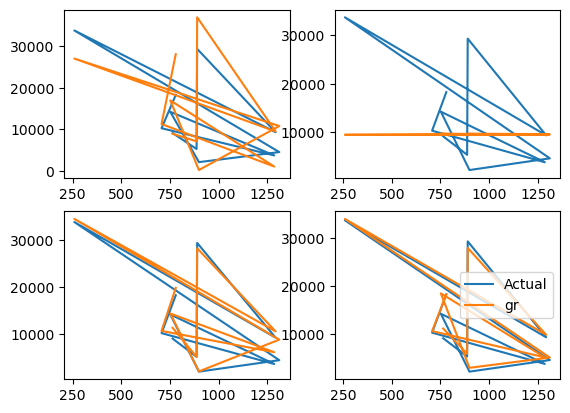

In [36]:
plt.subplot(221) # i.e 2row, 2columns and 1plot
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['Lr'].iloc[0:11],label = 'Lr')


plt.subplot(222) # i.e 2row, 2columns and 2plot
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['svm'].iloc[0:11],label = 'svm')

plt.subplot(223) # i.e 2row, 2columns and 3plot
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['rf'].iloc[0:11],label = 'rf')

plt.subplot(224) # i.e 2row, 2columns and 4plot
plt.plot(df1['Actual'].iloc[0:11],label = 'Actual')
plt.plot(df1['gr'].iloc[0:11],label = 'gr')

plt.legend()

In [37]:
# Evaluate our algorithms

from sklearn import metrics

In [38]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [39]:
print(score1,score2,score3,score4)

0.7833214205203848 -0.07229746602305465 0.8651364805173202 0.8753148077034605


In [40]:
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred4)

In [41]:
print(s1,s2,s3,s4)

4186.94010631701 8592.429900208082 2505.81966652985 2504.719038296119


In [42]:
# Predict Expenses for new customer

df ={'Age':40,'sex':1,'bmi':40.30,'children':4,'smoker':1,'region':2}

df = pd.DataFrame(df,index=[0])
df

,Age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [43]:
new_pred = gr.predict(df)
print(new_pred)

[43809.52931031]


In [44]:
# Save model using joblib

gr = GradientBoostingRegressor()
gr.fit(X, y)

GradientBoostingRegressor()

In [45]:
import joblib

In [46]:
joblib.dump(gr,'model_joblib_gr')

['model_joblib_gr']

In [47]:
model = joblib.load('model_joblib_gr')

In [48]:
model.predict(df)

array([42433.68041331])

In [59]:
# GUI i.e Insurance expense using machine learning

from tkinter import *

In [60]:
import joblib

In [ ]:

def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
       
    
    
    
    model = joblib.load('model_joblib_gr')
    result = model.predict([[p1,p2,p3,p4,p5,p6]])
    
    
    Label (master, text ='Insurance Cost').grid(row=7)
    Label (master, text = result).grid(row=8)




master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction',bg ='black',fg ='white").grid(row =0,columnspan=2)
Label(master, text="Enter your Age").grid(row=1)
Label(master, text="Male or Female [1/0]").grid(row=1)
Label(master, text="Enter Your BMI Value").grid(row=1)
Label(master, text="Enter Number of Children").grid(row=1)
Label(master, text="Smoker Yes/No [1/0]").grid(row=1)
Label(master, text="Region [1-4]").grid(row=1)



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row =1,columns = 1)
e2.grid(row =2,columns = 1)
e3.grid(row =3,columns = 1)
e4.grid(row =4,columns = 1)
e5.grid(row =5,columns = 1)
e6.grid(row =6,columns = 1)





Button(master, text='Predict', command=show_entry).grid()



master.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/y6/4737t3bd0rgd6q8b835q3w300000gn/T/ipykernel_7907/1278642061.py", line 3, in show_entry
    p1 = float(e1.get())
ValueError: could not convert string to float: ''
